In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import xarray as xr

In [9]:
df_rad = pd.read_csv('radar/test1.csv')
print(df_rad.columns)

Index(['Time stamp', ' Average velocity value', 'Average velocity unit',
       'Flow direction value', 'Flow direction unit', 'Average SNR value',
       'Average SNR unit', 'Tilt angle value', 'Tilt angle unit'],
      dtype='object')


1.573040380047506


<Axes: xlabel=' Average velocity value', ylabel='Count'>

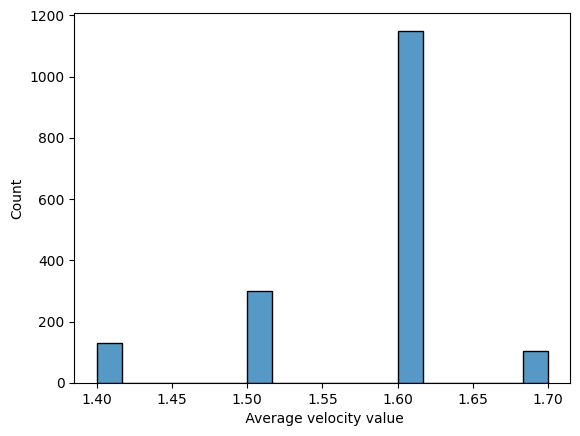

In [10]:
print(np.mean(df_rad[' Average velocity value']))

sns.histplot(
    data=df_rad,
    x=' Average velocity value'
)

In [11]:
df_vec = xr.open_dataset('radar/video_capture_2024-07-01_12-22-37_velocimetry_results.nc')
df_vec = df_vec.to_dataframe().reset_index()
df_vec

,time,y,x,v_x,v_y,s2n,corr,xp,yp,xs,...,v_len,sun_altitude,sun_azimuth,spacial_location,vegetation,visibility,cloudcover,solarradiation,uvindex,conditions
0,0.05,9.645,0.125,NaN,NaN,0.00,0.00,-516.845459,-125.344238,4.849573,...,NaN,1.242811,3.034119,4,dense,9.9,1.0,933,9,Clear
1,0.05,9.645,0.255,NaN,NaN,0.00,0.00,-468.762756,-80.596313,4.856762,...,NaN,1.242811,3.034119,4,dense,9.9,1.0,933,9,Clear
2,0.05,9.645,0.385,NaN,NaN,0.00,0.00,-423.157257,-38.153687,4.863951,...,NaN,1.242811,3.034119,4,dense,9.9,1.0,933,9,Clear
3,0.05,9.645,0.515,NaN,NaN,0.00,0.00,-379.842316,2.157104,4.871140,...,NaN,1.242811,3.034119,4,dense,9.9,1.0,933,9,Clear
4,0.05,9.645,0.645,NaN,NaN,0.00,0.00,-338.649628,40.492920,4.878329,...,NaN,1.242811,3.034119,4,dense,9.9,1.0,933,9,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424495,6.25,0.155,19.495,-0.01,0.02,2.76,0.47,1667.141235,1291.775879,15.396224,...,0.022361,1.242811,3.034119,0,dense,9.9,1.0,933,9,Clear
1424496,6.25,0.155,19.625,0.00,0.02,2.58,0.44,1665.152832,1293.273438,15.403413,...,0.020000,1.242811,3.034119,0,dense,9.9,1.0,933,9,Clear
1424497,6.25,0.155,19.755,-0.08,0.08,2.37,0.43,1663.186035,1294.754639,15.410602,...,0.113137,1.242811,3.034119,0,dense,9.9,1.0,933,9,Clear
1424498,6.25,0.155,19.885,-0.01,0.08,2.53,0.44,1661.240234,1296.220093,15.417791,...,0.080623,1.242811,3.034119,0,dense,9.9,1.0,933,9,Clear


0.7765180670895709


<Axes: xlabel='v_len', ylabel='Count'>

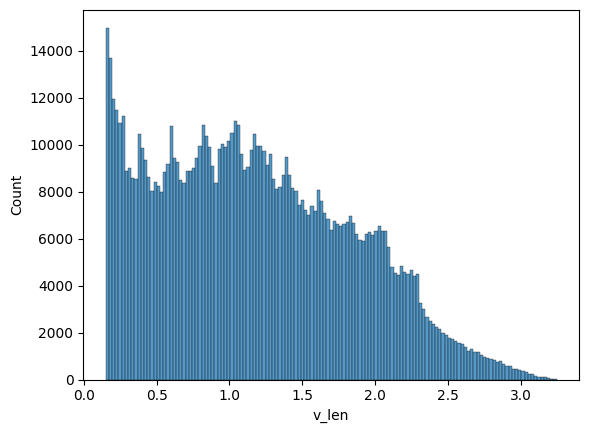

In [19]:
print(np.mean(df_vec.v_len))

sns.histplot(
    data=df_vec[df_vec.v_len > 0.15],
    x='v_len',
    # bins=16
)

1.128072499158404


<Axes: xlabel='v_len', ylabel='Count'>

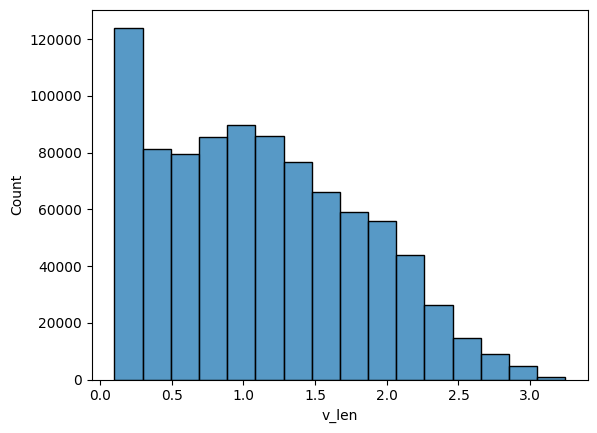

In [13]:
print(np.mean(df_vec[df_vec.v_len >= 0.1].v_len))

sns.histplot(
    data=df_vec[df_vec.v_len >= 0.1],
    x='v_len',
    bins=16
)

spacial location: 0    avg magnitude: 1.045136080853019


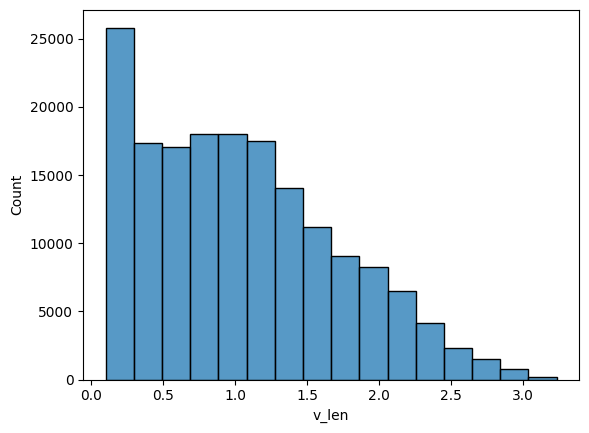

spacial location: 1    avg magnitude: 1.231977558765692


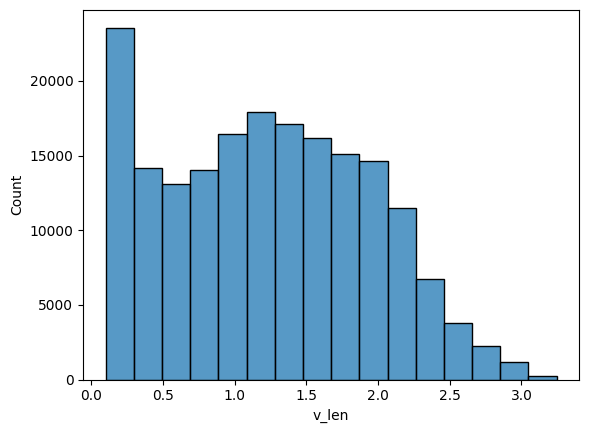

spacial location: 2    avg magnitude: 1.1883560940877989


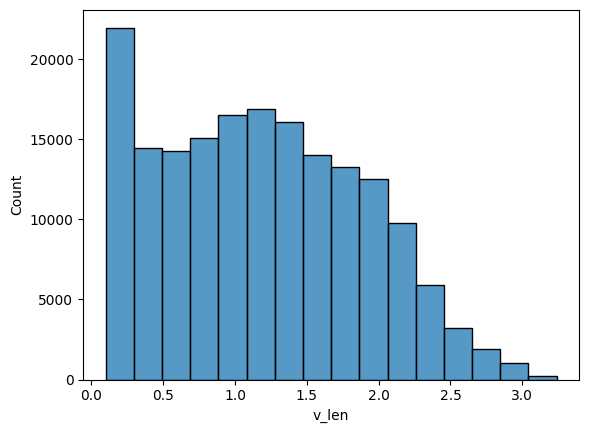

spacial location: 3    avg magnitude: 1.150399942991766


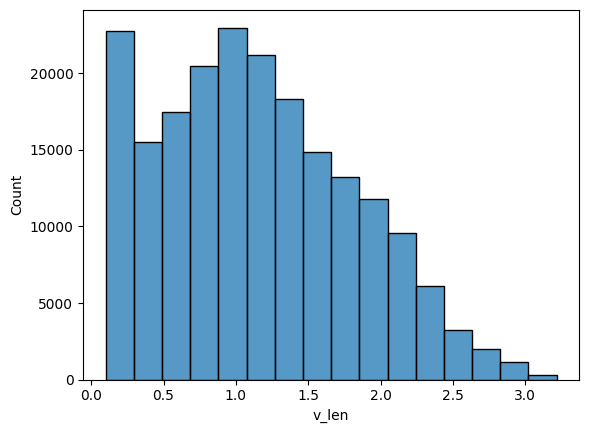

spacial location: 4    avg magnitude: 1.0041166487354258


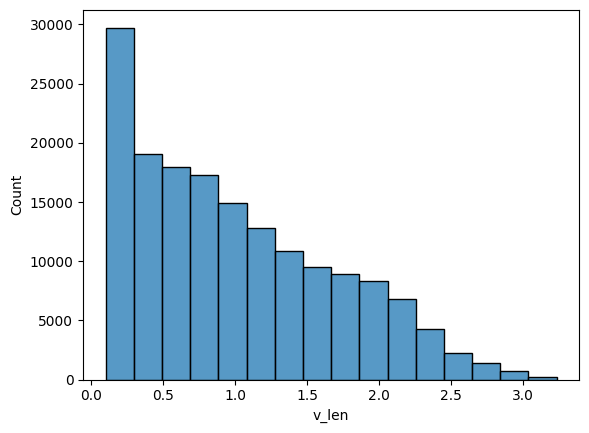

1.231977558765692


In [24]:
magnitudes = []
v_len = 0.1

for i in range(5):
    magnitudes.append(np.mean(df_vec[(df_vec.spacial_location == i) & (df_vec.v_len >= v_len)].v_len))
    print(f'spacial location: {i}    avg magnitude: {magnitudes[-1]}')

    sns.histplot(
        data=df_vec[(df_vec.spacial_location == i) & (df_vec.v_len >= v_len)],
        x='v_len',
        bins=16
    )
    plt.show()

print(max(magnitudes))